In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("dataset.csv")
data.head()

,Patient ID,Age,Blood Pressure,Cholesterol Levels,Heart Rate,BMI,Diagnosis,Treatment Plan,Recovery Status,Medication Type,Follow-up Requirement
0,101,65,130,250,72,28.0,Hypertension with high cholesterol.,"Medication: Lisinopril (blood pressure), Stati...",Active Recovery,"Lisinopril, Statins.",Quarterly.
1,102,42,110,150,76,24.0,Pre-hypertension.,"Lifestyle modification: Regular exercise, heal...",Recovered,N/A.,Six months.
2,103,58,140,200,80,30.0,Type 2 Diabetes.,Medication: Metformin (blood sugar control). L...,Active Recovery,Metformin.,Quarterly.
3,104,71,160,220,88,32.0,Heart Failure.,"Medication: Digoxin (heart function), Furosemi...",Active Recovery,"Digoxin, Furosemide.",Monthly.
4,105,35,120,180,74,27.0,Overweight.,"Lifestyle modification: Regular exercise, heal...",Recovered,N/A.,Three months.


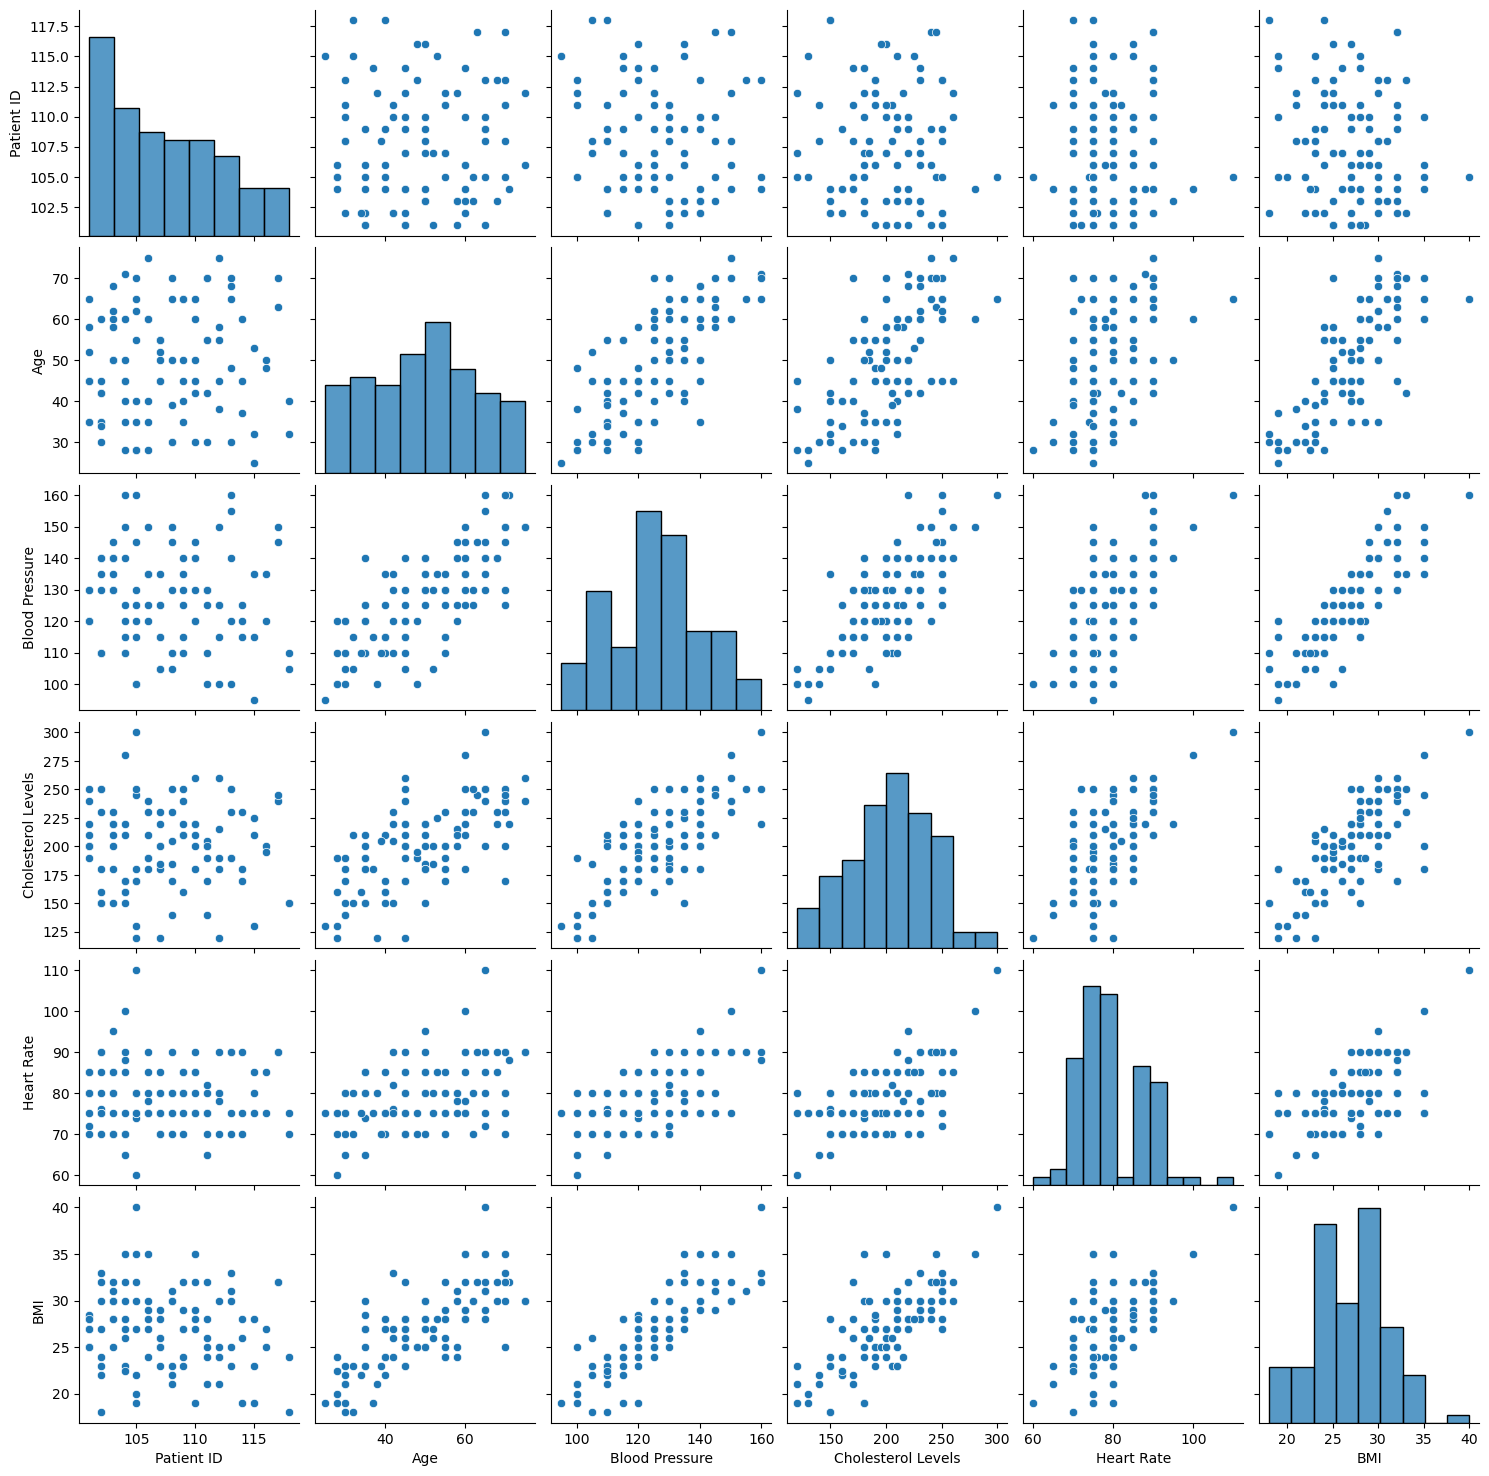

In [4]:
sns.pairplot(data)
plt.show()

In [5]:
meddata=data[['Age','Blood Pressure','Cholesterol Levels','Heart Rate','BMI','Diagnosis']]
meddata.head()

,Age,Blood Pressure,Cholesterol Levels,Heart Rate,BMI,Diagnosis
0,65,130,250,72,28.0,Hypertension with high cholesterol.
1,42,110,150,76,24.0,Pre-hypertension.
2,58,140,200,80,30.0,Type 2 Diabetes.
3,71,160,220,88,32.0,Heart Failure.
4,35,120,180,74,27.0,Overweight.


In [6]:
meddata['Diagnosis']=meddata['Diagnosis'].apply(
    lambda x:1 if any(condition in x for condition in ['Hypertension','Obesity','Overweight']) else 0
)

C:\Users\SUPRATIM NAG\AppData\Local\Temp\ipykernel_12896\1088618483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meddata['Diagnosis']=meddata['Diagnosis'].apply(


In [7]:
print(meddata['Diagnosis'].value_counts())

Diagnosis
0    63
1    37
Name: count, dtype: int64


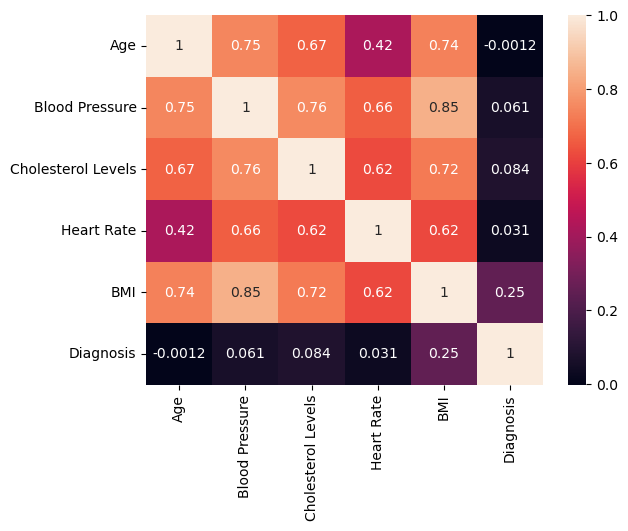

In [8]:
corr=meddata.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [9]:
x=meddata.drop('Diagnosis',axis=1)
y=meddata['Diagnosis']

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [20]:
from sklearn.svm import SVC
svclassifier=SVC(kernel='poly')
svclassifier.fit(x_train,y_train)

SVC(kernel='poly')

In [21]:
y_pred=svclassifier.predict(x_test)

In [22]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [23]:
from sklearn.metrics import classification_report ,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[13  0]
 [ 7  0]]
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        13
           1       0.00      0.00      0.00         7

    accuracy                           0.65        20
   macro avg       0.33      0.50      0.39        20
weighted avg       0.42      0.65      0.51        20



C:\Users\SUPRATIM NAG\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SUPRATIM NAG\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SUPRATIM NAG\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
